# Import

In [1]:
import sys
import os
sys.path.append("../src")

from utils import *
from mitigation_fct import *
from distance import *
from Gems_Wasserstein import *
from sampling import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy import stats
import json

# Loading every results

In [ ]:
result_path = '../Result/'
folders_name = os.listdir(result_path)
dic_arr_results = {}
for folder in folders_name:
    if (folder[-4:] != '.csv') and (folder[-5:] != '.json'):
        print(folder)
        files = os.listdir(result_path + folder)
        if files != []:
            dic_arr_results[folder] = {}
        for file in files:
            if file[-4:] == '.npy':
                try:
                    arr = np.load(file = result_path + folder + '/' + file)
                    dic_arr_results[folder][file[:-4]] = arr
                    print(f'successfuly loaded {file}')
                except:
                    print(f'error with the following : {file}')

ADULT
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
successfuly loaded Grad_reg_me.npy
successfuly loaded Grad_reg_nu.npy
successfuly loaded Miti_Gems_mean.npy
successfuly loaded Miti_Gems_number.npy
successfuly loaded Miti_grad.npy
successfuly loaded Miti_grad_look_alike.npy
successfuly loaded Miti_mod_SF.npy
successfuly loaded Miti_sampling_X.npy
successfuly loaded original.npy
successfuly loaded threshold.npy
ASC_EMP
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
successfuly loaded Grad_reg_me.npy
successfuly loaded Grad_reg_nu.npy
successfuly loaded Miti_Gems_mean.npy
successfuly loaded Miti_Gems_number.npy
successfuly loaded Miti_mod_SF.npy
successfuly loaded Miti_sampling_X.npy
successfuly loaded original.npy
successfuly loaded threshold.npy
successfuly loaded X_number_column.npy
ASC_INC
successfuly loaded DI.npy
successfuly loaded Grad_la_me.npy
successfuly loaded Grad_la_nu.npy
succes

In [4]:
dic_sample_size_folder = {
    'ADULT'   : [500, 1000],
    'ASC_EMP' : [2000, 4000],
    'ASC_INC' : [2000, 4000],
    'ASC_MOB' : [2000, 4000],
    'ASC_PUC' : [2000, 4000],
    'ASC_TRA' : [2000, 4000],
    'BAF'     : [2000, 4000],
}
folders_name = dic_sample_size_folder.keys()
method_list = ['Grad_reg_me', 'Grad_reg_nu', 'Grad_la_me', 'Grad_la_nu', 'Miti_mod_SF', 'Miti_sampling_X', 'Miti_Gems_number', 'Miti_Gems_mean']

In [ ]:
'''
dic_threshold = {}
for folder in dic_sample_size_folder.keys():
    dic_threshold[folder] = {}
    for n_sample in dic_sample_size_folder[folder]:
        dic_threshold[folder][str(n_sample)] = {}

dic_test_result = {}
for folder in dic_sample_size_folder.keys():
    dic_test_result[folder] = {}
    for n_sample in dic_sample_size_folder[folder]:
        dic_test_result[folder][str(n_sample)] = {}
        for method in method_list:
            dic_test_result[folder][str(n_sample)][method] = {}
            for dic_threshold_key in ['KL_A', 'W_A', 'KL_P', 'W_P', 'KS', 'MMD_A', 'MMD_P']:
                dic_test_result[folder][str(n_sample)][method][dic_threshold_key] = False
'''
dic_threshold_path = '../Result/dic_threshold.json'
dic_test_result_path    = '../Result/dic_test_result.json'
with open(dic_threshold_path, 'r') as f:
    dic_threshold = json.load(f)
with open(dic_test_result_path, 'r') as f:
    dic_test_result = json.load(f)

In [ ]:
dic_unbiasing_path = '../Result/dic_unbiasing.json'
with open(dic_unbiasing_path, "r") as f:
    dic_result_unbiasing = json.load(f)

# Compute mitigation result

## (X,S,Y) / All

In [42]:
dic_result_unbiasing = {'ALL' : {},
                        'P'   : {},
                        }
key = 'ALL'
max_wass_iter = 1e7
for folder in tqdm(folders_name):
    print(folder)
    dic_result_unbiasing[key][folder] = {}
    arr_original = dic_arr_results[folder]['original']
    n = len(arr_original)

    M = ot.dist(x1 = arr_original, 
                x2 = arr_original, 
                p=2, 
                metric = 'euclidean')
    for miti_method in method_list:
        if miti_method in ['Miti_Gems_number', 'Miti_Gems_mean']:
            lambdas = dic_arr_results[folder][miti_method][:,-1] 
            KL = KL_lambda_fct(lambdas)
            W  = ot.emd2(np.ones(n)/n, lambdas, M, numItermax=max_wass_iter)
        elif miti_method in ['Grad_reg_me', 'Grad_reg_nu', 'Grad_la_me', 'Grad_la_nu', 'Miti_mod_SF']:
            arr_miti = dic_arr_results[folder][miti_method]
            KL = float('inf')
            W  = (((arr_miti - arr_original)**2).sum(axis = 1)**(1/2)).mean()
        else:
            arr_miti = dic_arr_results[folder][miti_method]
            KL = KL_arr(arr_P = arr_original, 
                        arr_Q = arr_miti)
            
            W  = Wasserstein(arr_original, 
                             arr_miti, 
                             numItermax = max_wass_iter)
        dic_result_unbiasing[key][folder][miti_method] = [KL, W]
with open(dic_unbiasing_path, "w") as f:
    json.dump(dic_result_unbiasing, f)

  0%|          | 0/7 [00:00<?, ?it/s]

ADULT


 14%|█▍        | 1/7 [00:15<01:34, 15.83s/it]

ASC_EMP


 29%|██▊       | 2/7 [30:22<1:29:05, 1069.12s/it]

ASC_INC


 43%|████▎     | 3/7 [37:13<51:14, 768.56s/it]   

ASC_MOB


 57%|█████▋    | 4/7 [46:31<34:16, 685.55s/it]

ASC_PUC


 71%|███████▏  | 5/7 [1:04:30<27:35, 827.57s/it]

ASC_TRA


 86%|████████▌ | 6/7 [1:13:06<12:01, 721.43s/it]

BAF


100%|██████████| 7/7 [1:38:52<00:00, 847.53s/it]


## (S,Y) : Projection (P)

In [ ]:
dic_unbiasing_path = '../Result/dic_unbiasing.json'
key = 'P'
max_wass_iter = 1e7
for folder in tqdm(folders_name):
    print(folder)
    dic_result_unbiasing[key][folder] = {}
    arr_original = dic_arr_results[folder]['original'][:,-2:]
    n = len(arr_original)

    M = ot.dist(x1 = arr_original, 
                x2 = arr_original, 
                p=2, 
                metric = 'euclidean')
    for miti_method in method_list:
        if miti_method in ['Miti_Gems_number', 'Miti_Gems_mean']:
            lambdas = dic_arr_results[folder][miti_method][:,-1] 
            KL = KL_lambda_fct(lambdas)
            W  = ot.emd2(np.ones(n)/n, lambdas, M, numItermax=max_wass_iter)
        elif miti_method in ['Grad_reg_me', 'Grad_reg_nu', 'Grad_la_me', 'Grad_la_nu', 'Miti_mod_SF']:
            arr_miti = dic_arr_results[folder][miti_method][:,-2:]
            KL = KL_arr(arr_P = arr_original, 
                        arr_Q = arr_miti)
            W  = (((arr_miti - arr_original)**2).sum(axis = 1)**(1/2)).mean()
        else:
            arr_miti = dic_arr_results[folder][miti_method][:,-2:]
            KL = KL_arr(arr_P = arr_original, 
                        arr_Q = arr_miti)
            
            W  = Wasserstein(arr_original, 
                             arr_miti, 
                             numItermax = max_wass_iter)
        dic_result_unbiasing[key][folder][miti_method] = [KL, W]
with open(dic_unbiasing_path, "w") as f:
    json.dump(dic_result_unbiasing, f)

  0%|          | 0/7 [00:00<?, ?it/s]

ADULT


 14%|█▍        | 1/7 [00:07<00:44,  7.40s/it]

ASC_EMP


 29%|██▊       | 2/7 [03:00<08:44, 104.95s/it]

ASC_INC


 43%|████▎     | 3/7 [05:46<08:51, 132.92s/it]

ASC_MOB


 57%|█████▋    | 4/7 [09:09<08:00, 160.27s/it]

ASC_PUC


 71%|███████▏  | 5/7 [12:24<05:45, 172.87s/it]

ASC_TRA


 86%|████████▌ | 6/7 [15:31<02:57, 177.88s/it]

BAF


100%|██████████| 7/7 [18:42<00:00, 160.32s/it]


In [46]:
dic_W_A, dic_W_P, dic_KL_A, dic_KL_P = {}, {}, {}, {}
for folder in tqdm(folders_name):
    dic_W_A[folder], dic_W_P[folder], dic_KL_A[folder], dic_KL_P[folder] = {}, {}, {}, {}
     
    for miti_method in method_list:
        dic_W_A[folder][miti_method]  = dic_result_unbiasing['ALL'][folder][miti_method][1]
        dic_W_P[folder][miti_method]  = dic_result_unbiasing['P'][folder][miti_method][1]
        dic_KL_A[folder][miti_method] = dic_result_unbiasing['ALL'][folder][miti_method][0]
        dic_KL_P[folder][miti_method] = dic_result_unbiasing['P'][folder][miti_method][0]

100%|██████████| 7/7 [00:00<00:00, 61941.20it/s]


## Result mitigation

In [64]:
#print(pd.DataFrame(dic_W_A).transpose().to_latex(float_format="{:.2f}".format))
pd.DataFrame(dic_W_A).transpose().round(2)

,Grad_reg_me,Grad_reg_nu,Grad_la_me,Grad_la_nu,Miti_mod_SF,Miti_sampling_X,Miti_Gems_number,Miti_Gems_mean
ADULT,0.10,0.08,0.13,0.09,0.05,0.06,0.28,0.35
ASC_EMP,0.18,0.10,0.18,0.10,0.06,0.08,0.22,0.37
ASC_INC,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
ASC_MOB,0.21,0.06,0.23,0.08,0.03,0.05,0.18,0.64
ASC_PUC,0.21,0.13,0.22,0.14,0.12,0.16,0.33,0.48
ASC_TRA,0.02,0.02,0.02,0.02,0.01,0.01,0.03,0.03
BAF,0.01,0.00,0.02,0.01,0.00,0.01,0.02,0.05


In [ ]:
#print(pd.DataFrame(dic_W_P).transpose().to_latex(float_format="{:.2f}".format))
pd.DataFrame(dic_W_P).transpose().round(2)

,Grad_reg_me,Grad_reg_nu,Grad_la_me,Grad_la_nu,Miti_mod_SF,Miti_sampling_X,Miti_Gems_number,Miti_Gems_mean
ADULT,0.09,0.08,0.09,0.08,0.05,0.05,0.08,0.09
ASC_EMP,0.18,0.10,0.18,0.10,0.06,0.06,0.10,0.18
ASC_INC,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
ASC_MOB,0.18,0.06,0.18,0.06,0.03,0.03,0.06,0.18
ASC_PUC,0.21,0.13,0.21,0.13,0.12,0.10,0.13,0.21
ASC_TRA,0.02,0.02,0.02,0.02,0.01,0.01,0.02,0.02
BAF,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00


In [ ]:
#print(pd.DataFrame(dic_KL_A).transpose().to_latex(float_format="{:.2f}".format))
pd.DataFrame(dic_KL_A).transpose().round(2)

,index,Grad_reg_me,Grad_reg_nu,Grad_la_me,Grad_la_nu,Miti_mod_SF,Miti_sampling_X,Miti_Gems_number,Miti_Gems_mean
0,ADULT,inf,inf,inf,inf,inf,0.03,0.02,0.03
1,ASC_EMP,inf,inf,inf,inf,inf,0.04,0.04,0.07
2,ASC_INC,inf,inf,inf,inf,inf,0.00,0.00,0.00
3,ASC_MOB,inf,inf,inf,inf,inf,0.02,0.03,0.17
4,ASC_PUC,inf,inf,inf,inf,inf,0.06,0.07,0.10
5,ASC_TRA,inf,inf,inf,inf,inf,0.00,0.00,0.00
6,BAF,inf,inf,inf,inf,inf,0.00,0.00,0.00


In [69]:
#print(pd.DataFrame(dic_KL_P).transpose().to_latex(float_format="{:.2f}".format))
pd.DataFrame(dic_KL_P).transpose().reset_index().round(2)

,index,Grad_reg_me,Grad_reg_nu,Grad_la_me,Grad_la_nu,Miti_mod_SF,Miti_sampling_X,Miti_Gems_number,Miti_Gems_mean
0,ADULT,0.02,0.02,0.02,0.02,0.03,0.03,0.02,0.03
1,ASC_EMP,0.06,0.03,0.06,0.03,0.04,0.04,0.04,0.07
2,ASC_INC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,ASC_MOB,0.12,0.03,0.12,0.03,0.02,0.02,0.03,0.17
4,ASC_PUC,0.09,0.06,0.09,0.06,0.08,0.07,0.07,0.10
5,ASC_TRA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,BAF,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# 

# One by One criteria : 7 statistical tests

## KL

### A

In [ ]:
result_path = '../Result/'
verbose = True

In [8]:
iter_precision, threshold_DI = 30, 0.8
number_simulation = 30
dic_threshold_key = 'KL_A'

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original']
        try:
            KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            list_KL = []
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_KL.append(KL_arr(arr_P = arr_original, 
                                     arr_Q = sample))
            KL_values = np.array(list_KL)
            KL_goal = np.mean(KL_values) + 1.96 * np.std(KL_values)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = KL_goal

        print(KL_goal)
with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

ADULT 500
0.6523288404984056
ADULT 1000
0.4602126936232075
ASC_EMP 2000
0.6636384277858957
ASC_EMP 4000
0.4710491185449101
ASC_INC 2000
0.6681298581673051
ASC_INC 4000
0.4761302610009321
ASC_MOB 2000
0.6689984584770668
ASC_MOB 4000
0.4769763950197571
ASC_PUC 2000
0.6641912551585261
ASC_PUC 4000
0.47159402462469896
ASC_TRA 2000
0.6679567015191231
ASC_TRA 4000
0.47601199586646253
BAF 2000
0.6697414907006278
BAF 4000
0.47811241751322153


In [ ]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'KL_A'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(KL_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                                       arr_Q = sample)
                        
                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr, 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                          arr_Q = sample)

                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.6523288404984056
Miti_sampling_X 0 0.6500146290354982
Miti_Gems_number 0 0.6496340701799191
Miti_Gems_mean 1 0.6471238723987666
ADULT 1000
0.4602126936232075
Miti_Gems_number 0 0.4546701347163243
Miti_Gems_mean 2 0.45997897119287234
ASC_EMP 2000
0.6636384277858957
Miti_Gems_number 5 0.6625900605440965
Miti_Gems_mean 17 0.6614572760086513
ASC_EMP 4000
0.4710491185449101
ASC_INC 2000
0.6681298581673051
Miti_sampling_X 0 0.6665011292294097
Miti_Gems_number 6 0.6676502261168656
Miti_Gems_mean 1 0.6662575127531956
ASC_INC 4000
0.4761302610009321
Miti_sampling_X 2 0.4756396333210245
Miti_Gems_number 1 0.4758551536837228
Miti_Gems_mean 0 0.4752108582553656
ASC_MOB 2000
0.6689984584770668
Miti_Gems_number 1 0.6680457776998819
Miti_Gems_mean 7 0.6687398556124731
ASC_MOB 4000
0.4769763950197571
ASC_PUC 2000
0.6641912551585261
Miti_Gems_number 1 0.6618562968520302
Miti_Gems_mean 4 0.6637640899030945
ASC_PUC 4000
0.47159402462469896
ASC_TRA 2000
0.6679567015191231
Miti_sampling_X 1 0.6

c:\Users\Valentin\Documents\FairWashing\Inspection\Project\../src\utils.py:194: RuntimeWarning: divide by zero encountered in scalar divide
  DI =  PY1S0 / PY1S1


Miti_sampling_X 0 0.6697414907006276
Miti_Gems_number 0 0.6697414907006276
Miti_Gems_mean 1 0.6697414907006276
BAF 4000
0.47811241751322153
Miti_sampling_X 5 0.47811241751322137
Miti_Gems_number 4 0.47811241751322137
Miti_Gems_mean 14 0.47811241751322137


### S,Y

In [10]:
iter_precision, threshold_DI = 30, 0.8
dic_threshold_key = 'KL_P'

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        try:
            KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            list_KL = []
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_KL.append(KL_arr(arr_P = arr_original, 
                                     arr_Q = sample))
            KL_values = np.array(list_KL)
            KL_goal = np.mean(KL_values) + 1.96 * np.std(KL_values)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = KL_goal

        print(KL_goal)
with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

ADULT 500
0.007387210909613364
ADULT 1000
0.0025016865949332107
ASC_EMP 2000
0.0014916923214486452
ASC_EMP 4000
0.0007123088841801392
ASC_INC 2000
0.002134322717245999
ASC_INC 4000
0.0009521515440789872
ASC_MOB 2000
0.0018947498633600157
ASC_MOB 4000
0.0006082557971287465
ASC_PUC 2000
0.001640446926798198
ASC_PUC 4000
0.0007337039632826961
ASC_TRA 2000
0.0015663042066064942
ASC_TRA 4000
0.0009582885840549971
BAF 2000
0.00260673415930036
BAF 4000
0.0009802148371498684


In [15]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'KL_P'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(KL_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                           arr_Q = sample)
                        
                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                          arr_Q = sample)

                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.007387210909613364
ADULT 1000
0.0025016865949332107
ASC_EMP 2000
0.0014916923214486452
ASC_EMP 4000
0.0007123088841801392
ASC_INC 2000
0.002134322717245999
Grad_reg_me 2 0.001337421554516223
Grad_reg_nu 4 0.002006155149429145
Grad_la_me 0 0.001675492527180418
Grad_la_nu 3 0.0016232211557940524
Miti_mod_SF 3 0.0008563998726507857
Miti_sampling_X 5 0.0017548381905945973
Miti_Gems_number 2 0.0015645443211306578
Miti_Gems_mean 0 0.0010043725851408489
ASC_INC 4000
0.0009521515440789872
Grad_reg_me 7 0.0008470203006683552
Grad_reg_nu 0 0.0007645218002158352
Grad_la_me 1 0.0006374093050999577
Grad_la_nu 6 0.0006125655076884493
Miti_mod_SF 3 0.0006475665919176005
Miti_sampling_X 11 0.0009036060584103681
Miti_Gems_number 4 0.0006809484107272307
Miti_Gems_mean 4 0.0008088775592675554
ASC_MOB 2000
0.0018947498633600157
ASC_MOB 4000
0.0006082557971287465
ASC_PUC 2000
0.001640446926798198
ASC_PUC 4000
0.0007337039632826961
ASC_TRA 2000
0.0015663042066064942
Grad_reg_me 3 0.0015369076640

## W

### All

In [12]:
iter_precision, threshold_DI = 30, 0.8
dic_threshold_key = 'W_A'
max_wass_iter = 1e7

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original']
        try:
            W_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            list_W = []
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_W.append(Wasserstein(arr_original, sample, numItermax=max_wass_iter))
            W_values = np.array(list_W)
            W_goal = np.mean(W_values) + 1.96 * np.std(W_values)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = W_goal

        print(W_goal)
with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

ADULT 500
2.258969256212741
ADULT 1000
1.6614473046430562
ASC_EMP 2000
1.0557708829517187
ASC_EMP 4000
0.7984341244186378
ASC_INC 2000
0.8244517973476334
ASC_INC 4000
0.6385270568440914
ASC_MOB 2000
1.474245383880706
ASC_MOB 4000
1.1624879654437996
ASC_PUC 2000
1.3596476505431725
ASC_PUC 4000
1.0519348722995827
ASC_TRA 2000
1.506194977380715
ASC_TRA 4000
1.187508957248294
BAF 2000
3.518097610176718
BAF 4000
2.8800324563484394


In [32]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'W_A'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        W_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(W_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        W_sample = Wasserstein(arr_original, sample, numItermax=max_wass_iter)
                        
                        if W_sample < W_goal:
                            if verbose:
                                print(miti_method, i, W_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr, 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        W_sample = Wasserstein(arr_original, sample, numItermax=max_wass_iter)

                        if W_sample < W_goal:
                            if verbose:
                                print(miti_method, i, W_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
2.258969256212741
Grad_reg_me 0 2.1205012783626582
Grad_reg_nu 1 2.1863851876536944
Grad_la_me 0 2.2162975193027634
Grad_la_nu 0 2.0734562860325094
Miti_mod_SF 0 2.1902089777278464
Miti_sampling_X 0 2.1945717056514042
Miti_Gems_number 1 2.198576232812593
Miti_Gems_mean 2 2.09109825549832
ADULT 1000
1.6614473046430562
Grad_reg_me 6 1.5854568966907592
Grad_reg_nu 2 1.610319411720625
Grad_la_me 7 1.5646731448427142
Grad_la_nu 0 1.6300582559046575
Miti_mod_SF 2 1.608782215833677
Miti_sampling_X 2 1.6080793798566582
Miti_Gems_number 16 1.6300303653601698
Miti_Gems_mean 1 1.6171341434338804
ASC_EMP 2000
1.0557708829517187
Grad_reg_nu 4 1.0533787772614627
Miti_mod_SF 0 1.0283220589422843
Miti_sampling_X 15 1.0417894033342836
ASC_EMP 4000
0.7984341244186378
Miti_mod_SF 0 0.7971651973083617
Miti_sampling_X 0 0.7952119431030055
ASC_INC 2000
0.8244517973476334
Grad_reg_me 1 0.8101330918532605
Grad_reg_nu 2 0.8174592950846488
Grad_la_me 1 0.8135642368425112
Miti_mod_SF 0 0.80749793574168

### S,Y

In [14]:
iter_precision, threshold_DI = 30, 0.8
dic_threshold_key = 'W_P'
max_wass_iter = 1e7

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        try:
            W_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            list_W = []
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_W.append(Wasserstein(arr_original, sample, numItermax=max_wass_iter))
            W_values = np.array(list_W)
            W_goal = np.mean(W_values) + 1.96 * np.std(W_values)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = W_goal

        print(W_goal)
with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

ADULT 500
0.05071098717386906
ADULT 1000
0.0442565416548365
ASC_EMP 2000
0.026892568418064623
ASC_EMP 4000
0.016790627114501758
ASC_INC 2000
0.025512939089532446
ASC_INC 4000
0.014626319295569916
ASC_MOB 2000
0.018287678941854162
ASC_MOB 4000
0.011340578815555509
ASC_PUC 2000
0.027587482055039608
ASC_PUC 4000
0.02097476121420209
ASC_TRA 2000
0.028289661070388446
ASC_TRA 4000
0.018153394107354094
BAF 2000
0.01959234317014899
BAF 4000
0.012373328819117511


In [15]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'W_P'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        W_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(W_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        W_sample = Wasserstein(arr_original, sample, numItermax=max_wass_iter)
                        
                        if W_sample < W_goal:
                            if verbose:
                                print(miti_method, i, W_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        W_sample = Wasserstein(arr_original, sample, numItermax=max_wass_iter)

                        if W_sample < W_goal:
                            if verbose:
                                print(miti_method, i, W_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.05071098717386906
ADULT 1000
0.0442565416548365
ASC_EMP 2000
0.026892568418064623
ASC_EMP 4000
0.016790627114501758
ASC_INC 2000
0.025512939089532446
Grad_reg_me 3 0.016198885271170492
Grad_reg_nu 0 0.015127817459304973
Grad_la_me 1 0.015627817459304968
Grad_la_nu 2 0.02101518036156081
Miti_mod_SF 0 0.01994999999999993
Miti_sampling_X 2 0.008334924240491579
Miti_Gems_number 3 0.011949999999999867
Miti_Gems_mean 4 0.018449999999999887
ASC_INC 4000
0.014626319295569916
Grad_reg_me 0 0.009084924240491697
Grad_reg_nu 3 0.011199999999999936
Grad_la_me 4 0.010449999999999945
Grad_la_nu 0 0.014199999999999914
Miti_mod_SF 9 0.010449999999999944
Miti_sampling_X 0 0.012053910524340034
Miti_Gems_number 3 0.014449999999999914
Miti_Gems_mean 3 0.01294999999999993
ASC_MOB 2000
0.018287678941854162
ASC_MOB 4000
0.011340578815555509
ASC_PUC 2000
0.027587482055039608
ASC_PUC 4000
0.02097476121420209
ASC_TRA 2000
0.028289661070388446
Grad_reg_me 6 0.02675000000000002
Grad_reg_nu 0 0.02375000

## KS

In [ ]:
threshold_DI = 0.8
number_simulation = 200 #30
dic_threshold_key = 'KS'
S_index, Y_index = -2, -1
threshold_pvalue = 0.05
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        S0_index_P = arr_original[:,S_index] == 0
        YS0_P, YS1_P = arr_original[S0_index_P, Y_index], arr_original[~S0_index_P, Y_index]

        if verbose:
            print(folder, n_sample)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]

                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:
                        S0_index_sample = sample[:,S_index] == 0
                        YS0_s = sample[S0_index_sample, Y_index]
                        YS1_s = sample[~S0_index_sample, Y_index]
                        KS1_sample = stats.ks_2samp(YS1_P, YS1_s).pvalue
                        KS0_sample = stats.ks_2samp(YS0_P, YS0_s).pvalue
                        
                        if min(KS0_sample, KS1_sample) > threshold_pvalue:
                            if verbose:
                                print(miti_method, i, KS0_sample, KS1_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break

            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        S0_index_sample = sample[:,S_index] == 0
                        YS0_s = sample[S0_index_sample, Y_index]
                        YS1_s = sample[~S0_index_sample, Y_index]
                        KS1_sample = stats.ks_2samp(YS1_P, YS1_s).pvalue
                        KS0_sample = stats.ks_2samp(YS0_P, YS0_s).pvalue

                        if min(KS0_sample, KS1_sample) > threshold_pvalue:
                            if verbose:
                                print(miti_method, i, KS0_sample, KS1_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
ADULT 1000
ASC_EMP 2000
ASC_EMP 4000
ASC_INC 2000
Grad_reg_me 0 0.9927565040839798 0.8902126146649967
Grad_reg_nu 1 0.5016192922035897 0.9997277490086951
Grad_la_me 0 0.9968491539337975 0.5431748303377724
Grad_la_nu 1 1.0 0.8147056902656251
Miti_mod_SF 4 0.7208887822211616 0.9999915887513818
Miti_sampling_X 1 1.0 0.8652769879098032
Miti_Gems_number 0 0.9999875132964985 0.5846533765125144
Miti_Gems_mean 1 1.0 0.6809326972831959
ASC_INC 4000
Grad_reg_me 0 0.6009311427084447 1.0
Grad_reg_nu 0 0.6231446676447256 0.9938507871156075
Grad_la_me 1 0.7944008509697951 1.0
Grad_la_nu 0 0.7560370874567656 1.0
Miti_mod_SF 1 0.6824350280673842 1.0
Miti_sampling_X 1 0.9076095043193955 0.7972441105760639
Miti_Gems_number 0 0.5618772596897632 0.9999897392363638
Miti_Gems_mean 2 0.9865052504861398 0.662156315080721
ASC_MOB 2000
ASC_MOB 4000
ASC_PUC 2000
ASC_PUC 4000
ASC_TRA 2000
Grad_reg_me 1 0.6302245693256072 0.9999999650007713
Grad_reg_nu 0 0.9983735478257465 0.21954298349340196
Grad_la_me 

## MMD test

### (X,S,Y)

In [ ]:
iter_precision, threshold_DI = 30, 0.8
dic_threshold_key = 'MMD_A'

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original']
        list_MMD = []
        try:
            MMD_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_MMD.append(mmd_rbf(arr_original, sample))
            MMD_goal = np.array(list_MMD)
            MMD_goal = np.mean(MMD_goal) + 1.96 * np.std(MMD_goal)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = MMD_goal
        print(MMD_goal)

with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

In [19]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'MMD_A'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        MMD_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(MMD_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        MMD_sample = mmd_rbf(arr_original, sample)
                        
                        if MMD_sample < MMD_goal:
                            if verbose:
                                print(miti_method, i, MMD_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr, 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        MMD_sample = mmd_rbf(arr_original, sample)

                        if MMD_sample < MMD_goal:
                            if verbose:
                                print(miti_method, i, MMD_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.0020050268297042073
Grad_reg_me 0 0.001773997709283607
Grad_reg_nu 1 0.001907706508089373
Grad_la_me 1 0.001983122453761992
Grad_la_nu 4 0.0018301564890985294
Miti_mod_SF 1 0.001798824612625015
Miti_sampling_X 6 0.0018113435741067656
Miti_Gems_number 2 0.0017544312019889376
Miti_Gems_mean 2 0.0017732973858909573
ADULT 1000
0.0008819824077998349
Grad_reg_me 4 0.0008749753677719414
Grad_reg_nu 3 0.0008695394498559935
Grad_la_nu 4 0.0008001179072676242
Miti_mod_SF 0 0.0008178905794310474
Miti_Gems_number 20 0.0007986594658148834
Miti_Gems_mean 2 0.0007807758059175541
ASC_EMP 2000
0.0005063156414494701
Grad_reg_nu 0 0.00048057341646340693
Grad_la_nu 0 0.00048413222827345826
Miti_mod_SF 3 0.00047939003508713687
Miti_sampling_X 22 0.0005023317190626679
Miti_Gems_number 8 0.00043262906018219204
ASC_EMP 4000
0.00021785694837284038
Miti_mod_SF 2 0.00021286690877905454
ASC_INC 2000
0.0004964857582835287
Grad_reg_me 3 0.0004632390975300663
Grad_reg_nu 0 0.00048428016050644854
Grad_la_

### (X,S) (P)

In [ ]:
iter_precision = 30
dic_threshold_key = 'MMD_P'

for folder in dic_sample_size_folder.keys():
    for n_sample in dic_sample_size_folder[folder]:
        print(folder, n_sample)
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        try:
            MMD_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]
        except:
            list_MMD = []
            for i in range(iter_precision):
                sample = sample_arr(arr_original, 
                                    n_sample)
                list_MMD.append(mmd_rbf(arr_original, sample))
            MMD_goal = np.array(list_MMD)
            MMD_goal = np.mean(MMD_goal) + 1.96 * np.std(MMD_goal)
            dic_threshold[folder][str(n_sample)][dic_threshold_key] = MMD_goal.item()

        print(MMD_goal)
with open(dic_threshold_path, "w") as f:
    json.dump(dic_threshold, f)

ADULT 500
0.0019985587693636575
ADULT 1000
0.0008258931136169193
ASC_EMP 2000
0.00045490437546652366
ASC_EMP 4000
0.00027743953331753064
ASC_INC 2000
0.00046383314519234445
ASC_INC 4000
0.00023190764350921879
ASC_MOB 2000
0.00032880869406351466
ASC_MOB 4000
0.00011125304525803435
ASC_PUC 2000
0.0005569390684260188
ASC_PUC 4000
0.00027957515483168237
ASC_TRA 2000
0.0007547562102820821
ASC_TRA 4000
0.0002434182572144285
BAF 2000
0.00024744426
BAF 4000
0.00019790036


In [21]:
threshold_DI = 0.8
number_simulation = 30
dic_threshold_key = 'MMD_P'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        MMD_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(MMD_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        MMD_sample = mmd_rbf(arr_original, sample)
                        
                        if MMD_sample < MMD_goal:
                            if verbose:
                                print(miti_method, i, MMD_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        MMD_sample = mmd_rbf(arr_original, sample)

                        if MMD_sample < MMD_goal:
                            if verbose:
                                print(miti_method, i, MMD_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            break
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.0019985587693636575
ADULT 1000
0.0008258931136169193
ASC_EMP 2000
0.00045490437546652366
ASC_EMP 4000
0.00027743953331753064
ASC_INC 2000
0.00046383314519234445
Grad_reg_me 4 6.592360709745115e-05
Grad_reg_nu 1 0.0001046426066249051
Grad_la_me 0 0.00010638322324640903
Grad_la_nu 0 0.00021622027093926022
Miti_mod_SF 0 5.947901902469965e-05
Miti_sampling_X 0 0.0003878748063428361
Miti_Gems_number 2 0.00024186492287681105
Miti_Gems_mean 7 9.856470015567886e-05
ASC_INC 4000
0.00023190764350921879
Grad_reg_me 0 0.00019111906963975578
Grad_reg_nu 0 0.00011220110550969054
Grad_la_me 0 4.023337096326074e-05
Grad_la_nu 3 0.00018211805938661563
Miti_mod_SF 1 0.00021041740171190426
Miti_sampling_X 0 5.34785843115948e-05
Miti_Gems_number 2 5.872219443059379e-05
Miti_Gems_mean 1 0.00011169415436174113
ASC_MOB 2000
0.00032880869406351466
ASC_MOB 4000
0.00011125304525803435
ASC_PUC 2000
0.0005569390684260188
ASC_PUC 4000
0.00027957515483168237
ASC_TRA 2000
0.0007547562102820821
Grad_reg_m

In [ ]:
arr_original   = dic_arr_results[folder]['original'][:,-2:]

## Robustness : distribution of number of samples (test of the impact of number_simulation)

In [8]:
verbose = True

KL_P

In [10]:
threshold_DI = 0.8
number_simulation = 1000
dic_threshold_key = 'KL_P'
iteration_number_result = []

for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original'][:,-2:]
        KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(KL_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                           arr_Q = sample)
                        
                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                          arr_Q = sample)

                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

ADULT 500
0.007387210909613364
ADULT 1000
0.0025016865949332107
ASC_EMP 2000
0.0014916923214486452
ASC_EMP 4000
0.0007123088841801392
ASC_INC 2000
0.002134322717245999
Grad_reg_me 1 0.001735148321208739
Grad_reg_nu 0 0.0007198060172557072
Grad_la_me 0 0.0010997371650952534
Grad_la_nu 0 0.0019692649791231073
Miti_mod_SF 6 0.002065813113293548
Miti_sampling_X 4 0.0006176994646699616
Miti_Gems_number 2 0.001810454538487126
Miti_Gems_mean 1 0.0008052347166674981
ASC_INC 4000
0.0009521515440789872
Grad_reg_me 2 0.0008288258462549047
Grad_reg_nu 2 0.0006764228836783487
Grad_la_me 4 0.0006095596178384358
Grad_la_nu 2 0.0009213368885921946
Miti_mod_SF 1 0.0007462243818021699
Miti_sampling_X 13 0.0007749266177768596
Miti_Gems_number 1 0.0007206934320711997
Miti_Gems_mean 5 0.0007693220424973765
ASC_MOB 2000
0.0018947498633600157
ASC_MOB 4000
0.0006082557971287465
ASC_PUC 2000
0.001640446926798198
ASC_PUC 4000
0.0007337039632826961
ASC_TRA 2000
0.0015663042066064942
Grad_reg_me 2 0.0011456341652

KL_A (longer time to compute by far)

In [ ]:
threshold_DI = 0.8
number_simulation = 100
dic_threshold_key = 'KL_A'
    
for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        KL_goal = dic_threshold[folder][str(n_sample)][dic_threshold_key]

        if verbose:
            print(folder, n_sample)
            print(KL_goal)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                                       arr_Q = sample)
                        
                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr, 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        KL_sample = KL_arr(arr_P = arr_original, 
                                          arr_Q = sample)

                        if KL_sample < KL_goal:
                            if verbose:
                                print(miti_method, i, KL_sample)
                            dic_test_result[folder][str(n_sample)][miti_method][dic_threshold_key] = True
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
with open(dic_test_result_path, "w") as f:
    json.dump(dic_test_result, f)

KS

In [11]:
threshold_DI = 0.8
number_simulation = 100 #30
dic_threshold_key = 'KS'
S_index, Y_index = -2, -1
threshold_pvalue = 0.05   
#iteration_number_result = []

for folder in folders_name:
    for n_sample in dic_sample_size_folder[folder]:
        
        arr_original   = dic_arr_results[folder]['original']
        S0_index_P = arr_original[:,S_index] == 0
        YS0_P, YS1_P = arr_original[S0_index_P, Y_index], arr_original[~S0_index_P, Y_index]

        if verbose:
            print(folder, n_sample)

        for miti_method in method_list:

            arr = dic_arr_results[folder][miti_method]
            if miti_method in ['Miti_Gems_mean', 'Miti_Gems_number']:
                lambdas = arr[:,-1]  
                indexs = np.arange(len(lambdas))
                for i in range(number_simulation):
                    
                    indexs_choice = np.random.choice(indexs,
                                                     size = n_sample,
                                                     replace = False,
                                                     p = lambdas)
                    
                    sample = arr_original[indexs_choice]

                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    
                    if DI > threshold_DI:
                        S0_index_sample = sample[:,S_index] == 0
                        YS0_s = sample[S0_index_sample, Y_index]
                        YS1_s = sample[~S0_index_sample, Y_index]
                        KS1_sample = stats.ks_2samp(YS1_P, YS1_s).pvalue
                        KS0_sample = stats.ks_2samp(YS0_P, YS0_s).pvalue
                        
                        if min(KS0_sample, KS1_sample) > threshold_pvalue:
                            if verbose:
                                print(miti_method, i, KS0_sample, KS1_sample)
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
                        
            else:
                for i in range(number_simulation):
                    sample = sample_arr(arr[:,-2:], 
                                        n_sample)
                    DI = DI_fct(sample, 
                                S_index = -2, 
                                Y_index = -1)
                    if DI > threshold_DI:

                        S0_index_sample = sample[:,S_index] == 0
                        YS0_s = sample[S0_index_sample, Y_index]
                        YS1_s = sample[~S0_index_sample, Y_index]
                        KS1_sample = stats.ks_2samp(YS1_P, YS1_s).pvalue
                        KS0_sample = stats.ks_2samp(YS0_P, YS0_s).pvalue

                        if min(KS0_sample, KS1_sample) > threshold_pvalue:
                            if verbose:
                                print(miti_method, i, KS0_sample, KS1_sample)
                            iteration_number_result.append(i)
                            break
                iteration_number_result.append(i)
#with open(dic_test_result_path, "w") as f:
#    json.dump(dic_test_result, f)

ADULT 500
Grad_la_me 16 0.07782813710569549 0.061813265362247766
Grad_la_nu 35 0.05197912139603382 0.05220230352227446
Miti_mod_SF 45 0.0554434979851348 0.051542136398943665
Miti_Gems_number 27 0.05797121737607387 0.06669960549876804
Miti_Gems_mean 44 0.05932785089415991 0.05490902313981449
ADULT 1000
ASC_EMP 2000
ASC_EMP 4000
ASC_INC 2000
Grad_reg_me 1 0.9959915433034783 0.4146631506097004
Grad_reg_nu 1 0.8282328962159977 0.998149403269628
Grad_la_me 2 1.0 0.6071382568200251
Grad_la_nu 2 0.9991573815623971 0.831177085171624
Miti_mod_SF 0 0.666653891690193 0.9857618745299791
Miti_sampling_X 0 0.6817187508321393 1.0
Miti_Gems_number 2 0.9866942152094322 0.9999994370388366
Miti_Gems_mean 4 0.9978468235145745 0.8275907006525216
ASC_INC 4000
Grad_reg_me 0 0.3733422134751302 0.5097847092047982
Grad_reg_nu 0 0.8706211360093086 0.8696614962038822
Grad_la_me 3 0.5568820007239981 0.9837226220823627
Grad_la_nu 0 0.7838969915280453 0.9999999999990625
Miti_mod_SF 0 0.9613276356643592 0.98022579446

In [25]:
iteration_number_result_KS = iteration_number_result

In [12]:
x, heights = np.unique(np.array(iteration_number_result), return_counts=True)

In [34]:
heights[(x <= 50) + (x == 999)].sum() / heights.sum()

np.float64(0.7753846153846153)

<BarContainer object of 28 artists>

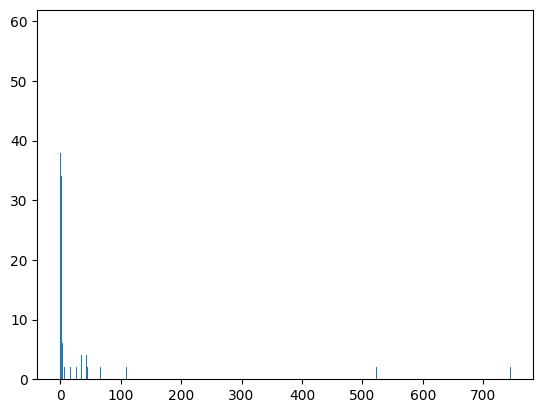

In [17]:
plt.bar(x[:-1], heights[:-1])

<BarContainer object of 20 artists>

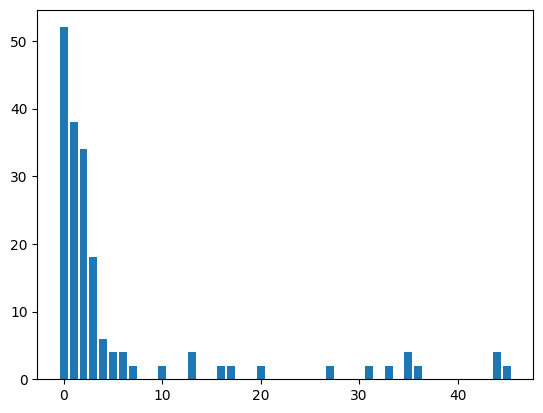

In [22]:
plt.bar(x[:-9], heights[:-9])

<BarContainer object of 22 artists>

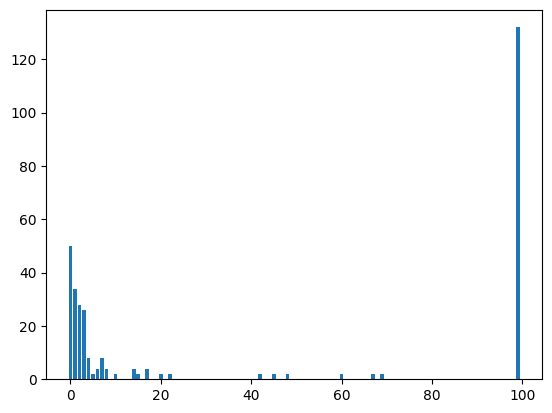

In [29]:
plt.bar(x, heights)

In [36]:
((np.array(iteration_number_result) < 30) + (np.array(iteration_number_result) > 98)).sum() / len(iteration_number_result)

np.float64(0.9629629629629629)

## Test result

In [34]:
dic_test_result_summary = {}
for folder in folders_name:
    dic_test_result_summary[folder] = {}
    for method in method_list:
        
        KL_A_res, W_A_res, KL_P_res, W_P_res, KS_res = np.zeros(2), np.zeros(2), np.zeros(2), np.zeros(2), np.zeros(2)
        MMD_A_res, MMD_P_res = np.zeros(2), np.zeros(2)

        for count, n_sample in enumerate(dic_sample_size_folder[folder]):
        
            KL_A_res[count] = int(dic_test_result[folder][str(n_sample)][method]['KL_A'] *1)
            KL_P_res[count] = int(dic_test_result[folder][str(n_sample)][method]['KL_P'] *1)
            W_A_res[count]  = int(dic_test_result[folder][str(n_sample)][method]['W_A']  *1)
            W_P_res[count]  = int(dic_test_result[folder][str(n_sample)][method]['W_P']  *1)
            MMD_A_res[count]  = int(dic_test_result[folder][str(n_sample)][method]['MMD_A']  *1)
            MMD_P_res[count]  = int(dic_test_result[folder][str(n_sample)][method]['MMD_P']  *1)
            KS_res[count]   = int(dic_test_result[folder][str(n_sample)][method]['KS']   *1)
        dic_test_result_summary[folder][method] = str(int(2 - KL_A_res.sum().item())) + str(int(2 -KL_P_res.sum().item())) + str(int(2 - W_A_res.sum().item()))  + str(int(2 -W_P_res.sum().item())) +  str(int(2 -KS_res.sum().item())) + str(int(2 - MMD_A_res.sum().item()))  + str(int(2 -MMD_P_res.sum().item()))

In our paper, the table below corresponds to the test result with 0 transformed as "-", 1 transformed as a circle, and 2 transformed as a circle within a circle.

In [41]:
print(pd.DataFrame(dic_test_result_summary).transpose().to_latex(index = True))

\begin{tabular}{lllllllll}
\toprule
 & Grad_reg_me & Grad_reg_nu & Grad_la_me & Grad_la_nu & Miti_mod_SF & Miti_sampling_X & Miti_Gems_number & Miti_Gems_mean \\
\midrule
ADULT & 22022 & 22022 & 22022 & 22022 & 22022 & 12022 & 02022 & 02022 \\
ASC_EMP & 22222 & 22122 & 22222 & 22122 & 22022 & 22022 & 12222 & 12222 \\
ASC_INC & 20000 & 20000 & 20000 & 20000 & 20000 & 00000 & 00000 & 00000 \\
ASC_MOB & 22222 & 22022 & 22222 & 22022 & 22022 & 22022 & 12122 & 12222 \\
ASC_PUC & 22222 & 22122 & 22222 & 22122 & 22122 & 22122 & 12222 & 12222 \\
ASC_TRA & 20000 & 20000 & 20000 & 20000 & 21000 & 00000 & 00000 & 00000 \\
BAF & 21000 & 21000 & 20000 & 21000 & 20000 & 00000 & 00000 & 01000 \\
\bottomrule
\end{tabular}



In [37]:
print(pd.DataFrame(dic_test_result_summary).drop(['Grad_la_me', 'Grad_la_nu']).transpose().to_latex(index = True))

\begin{tabular}{lllllll}
\toprule
 & Grad_reg_me & Grad_reg_nu & Miti_mod_SF & Miti_sampling_X & Miti_Gems_number & Miti_Gems_mean \\
\midrule
ADULT & 2202202 & 2202202 & 2202202 & 1202212 & 0202202 & 0202202 \\
ASC_EMP & 2222222 & 2212212 & 2202202 & 2202212 & 1222212 & 1222222 \\
ASC_INC & 2000000 & 2000000 & 2000000 & 0000000 & 0000000 & 0000000 \\
ASC_MOB & 2222222 & 2202202 & 2202202 & 2202212 & 1212212 & 1222222 \\
ASC_PUC & 2222222 & 2212212 & 2212212 & 2212222 & 1222212 & 1222222 \\
ASC_TRA & 2000000 & 2000000 & 2000000 & 0000000 & 0000000 & 0000000 \\
BAF & 2000000 & 2000000 & 2000000 & 0000000 & 0000000 & 0000000 \\
\bottomrule
\end{tabular}

